# Estimate MI with BA Bound for CMB dataset
In this experiment, we try to use MI to show that PS is the opitmal statistics for gaussian random field.

In [1]:
from tools.Trainer import train_ba
from tools.Trainer import feature_selection

## Dataset Preparation
Here is a brief introduction of how we generate CMB-like Gaussian random fields.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

In [ ]:
#Set up a new set of parameters for CAMB
# in this experiment, we only vary omega_c and h using linspace
# omega_c_list=np.linspace(0.21, 0.31,100)
# h_list=np.linspace(0.64, 0.76,100)
#below is an example of how we generate one mock sample


pars = camb.CAMBparams()
#This function sets up with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=60, ombh2=0.022, omch2=0.30, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

## Pure Signal

### 1. PS

In [13]:
ps=np.load('dataset/CMB_data/ps.npy')[:,1:]
param=np.load('dataset/CMB_data/param.npy')

In [14]:
ps=(ps-np.mean(ps,axis=0))/np.std(ps,axis=0)

param=2*((param-np.min(param,axis=0))/(np.max(param,axis=0)-np.min(param,axis=0))-1/2)

To mitigate the risk of overfitting, we employ a dataset splitting strategy, dividing the dataset into a training set and a validation set. The training set is utilized for training the normalizing flow (NF) model, while the validation set is used for model validation. Subsequently, we select the model with the highest validation score to calculate the mutual information (MI) estimation across the entire dataset.

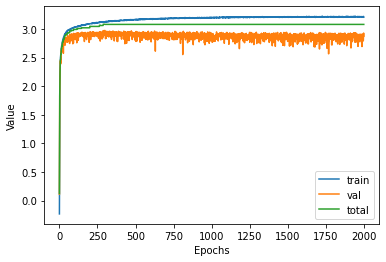

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [15]:
train_MIs,eval_MIs,total_MIs=train_ba(
    ps,
    param,
    train_info={'epochs':2000,'batch_size':100,'learning_rate':1e-4,'weigth_decay':1e-4},
    verbose=True)

Final Results

In [16]:
total_MIs[-1]

3.0785288772636896

### 2. BS

In [27]:
bs=np.load('dataset/CMB_data/bs.npy')[:,1:]
param=np.load('dataset/CMB_data/param.npy')

In [29]:
bs=(bs-np.mean(bs,axis=0))/np.std(bs,axis=0)

param=2*((param-np.min(param,axis=0))/(np.max(param,axis=0)-np.min(param,axis=0))-1/2)

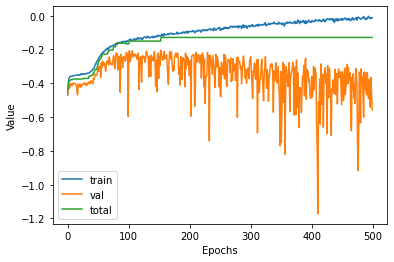

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [30]:
train_MIs,eval_MIs,total_MIs=train_ba(
    bs,
    param,
    train_info={'epochs':500,'batch_size':100,'learning_rate':1e-4,'weigth_decay':1e-4},
    verbose=True)

Final Results

In [31]:
total_MIs[-1]

-0.12870479010996783

In [32]:
mask=feature_selection(bs,param)
bs=bs[:,mask]

In [34]:
bs.shape

(10000, 0)

### 3. PS&BS

In [36]:
ps=np.load('dataset/CMB_data/ps.npy')[:,1:]
bs=np.load('dataset/CMB_data/bs.npy')[:,1:]
pb=np.hstack([ps,bs])
param=np.load('dataset/CMB_data/param.npy')

In [38]:
pb=(pb-np.mean(pb,axis=0))/np.std(pb,axis=0)

param=2*((param-np.min(param,axis=0))/(np.max(param,axis=0)-np.min(param,axis=0))-1/2)

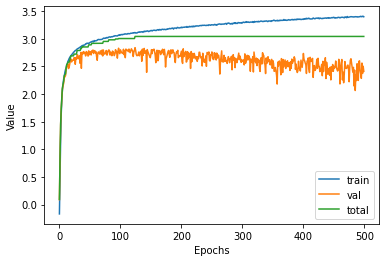

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [39]:
train_MIs,eval_MIs,total_MIs=train_ba(
    pb,
    param,
    train_info={'epochs':500,'batch_size':100,'learning_rate':1e-4,'weigth_decay':1e-4},
    verbose=True)

In [40]:
total_MIs[-1]

3.0437014064842707

### 4. ST

In [72]:
st=np.load('dataset/CMB_data/st.npy')
param=np.load('dataset/CMB_data/param_st.npy')

In [73]:
st=(st-np.mean(st,axis=0))/np.std(st,axis=0)

param=2*((param-np.min(param,axis=0))/(np.max(param,axis=0)-np.min(param,axis=0))-1/2)

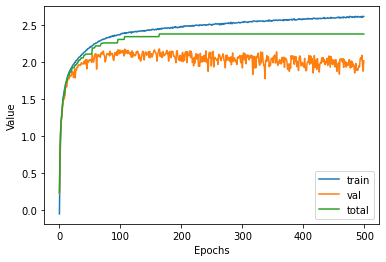

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [74]:
train_MIs,eval_MIs,total_MIs=train_ba(
    st,
    param,
    train_info={'epochs':500,'batch_size':100,'learning_rate':1e-4,'weigth_decay':1e-4},
    verbose=True)

In [75]:
total_MIs[-1]

2.377071078782702

In [ ]:
mask=feature_selection(st,param)
st=st[:,mask]

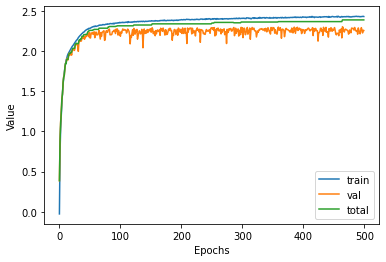

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [67]:
train_MIs,eval_MIs,total_MIs=train_ba(
    st,
    param,
    train_info={'epochs':500,'batch_size':100,'learning_rate':1e-4,'weigth_decay':1e-4},
    verbose=True)

In [68]:
total_MIs[-1]

2.3896707258278376

### Plot Results

In [69]:
# re_all=[{'ST_pure': 5.14,
#   'BS&PS_pure': 4.87,
#   'PS_pure': 4.04,
#   'BS_pure': 3.70},
#  {'ST_ns': 1.05,
#   'BS&PS_ns': 1.00,
#   'PS_ns': 0.70,
#   'BS_ns': 0.31},
#  {'ST_obs': 0.53,
#   'BS&PS_obs': 0.48,
#   'PS_obs': 0.43,
#   'BS_obs': -0.04}]
re_all=[{'ps': 3.08,
    'ps&bs':3.04,
    'st':2.39,
  'bs': -0.13,}
  ]

In [50]:
# def barplot(input:list,group_legend:list)

In [52]:
bstrp_ps=np.load('/work/dante/scripts/MI4StatsEval/test_bsp_cam_ps.npy')

In [53]:
bstrp_ps.shape

(10,)

In [57]:
np.std(bstrp_ps)*3

0.04038887645309658

(array([2., 0., 1., 2., 1., 1., 0., 1., 1., 1.]),
 array([3.06849086, 3.07285111, 3.07721135, 3.0815716 , 3.08593185,
        3.09029209, 3.09465234, 3.09901259, 3.10337283, 3.10773308,
        3.11209333]),
 <BarContainer object of 10 artists>)

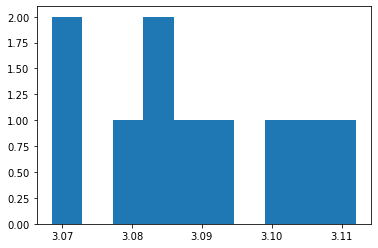

In [56]:
plt.hist(bstrp_ps)

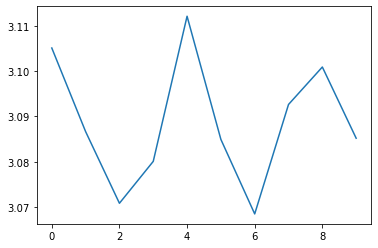

In [54]:
plt.plot(bstrp_ps)

Text(0.5, 0, 'Summary Statistics')

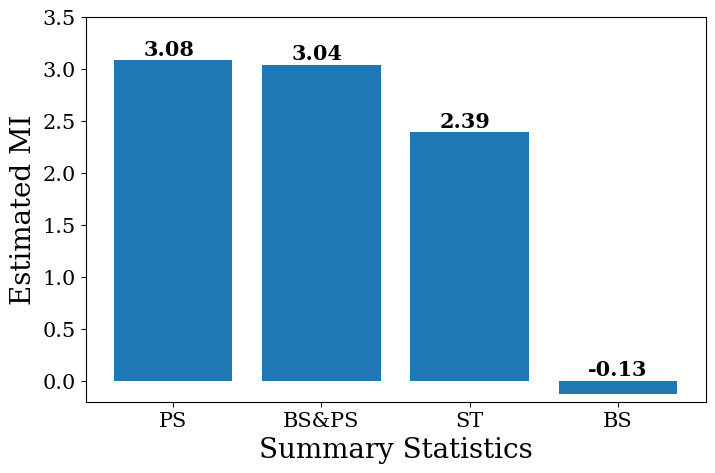

In [87]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

fig=plt.figure(figsize=(8,5),facecolor=(1,1,1))

tick_names=['PS','BS&PS','ST','BS',]
mi_total=[]
for i in range(len(re_all)):
    names, mis = zip(*re_all[i].items())
    
    plt.bar(np.arange(i*4,i*4+4),mis)
    
    mi_total=mi_total+list(mis)
    # tick_names=tick_names+list(names)

plt.xticks(range(len(tick_names)), labels=tick_names,fontsize=15)
for i in range(len(tick_names)):
    if mi_total[i]>0:
        plt.text(i-0.2, np.array(mi_total[i])+0.05, "{:.2f}".format(mi_total[i]), color='black', fontweight='bold',fontsize=15)
    else:
        plt.text(i-0.2, 0.05, "{:.2f}".format(mi_total[i]), color='black', fontweight='bold',fontsize=15)

mi_total=np.array(mi_total)
plt.yticks(fontsize=15)
patches=[]
plt.ylim(-0.2,3.5)
plt.ylabel(r"Estimated MI",fontsize=20)
plt.xlabel("Summary Statistics",fontsize=20)

In [88]:
fig.savefig('/work/dante/scripts/Inference_21cm/Results/MI_plots/MI_compare_CMB.pdf',bbox_inches = "tight")